In [1]:
import numpy as np
from scipy import fftpack
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import Lab3Functions as lf3
import funktionen_M as fm


## Importieren der Daten

In [2]:
#Importiern der Daten von Matti: Weights, MVC und Fatigue
weights_01, mvc_01, fatigue_01 = lf3.import_data(';')
#Extrahieren der Zeit
weights_01_time = weights_01['time']
mvc_01_time = mvc_01['time'] / 1000 #Umwandlung in Sekunden
fatigue_01_time = fatigue_01['time']
#Extrahieren der EMG Daten
weights_01_emg = weights_01['emg']
mvc_01_emg = mvc_01['emg'] 
fatigue_01_emg = fatigue_01['emg']


#Importierung der Daten von Markus: MVC
mvc_02 = lf3.import_mvc('Markus', ';')
#Extrahierung der Zeit
mvc_02_time = mvc_02['time'] / 1000 #Umwandlung in Sekunden
#Extrahierung der EMG Daten
mvc_02_emg = mvc_02['emg']

#Importierung der Daten von Jannis: MVC
mvc_03 = lf3.import_mvc('Jannis', ';')
#Extrahierung der Zeit
mvc_03_time = mvc_03['time'] / 1000 #Umwandlung in Sekunden
#Extrahierung der EMG Daten
mvc_03_emg = mvc_03['emg']


### Entfernen des Offsets

In [3]:
#Entgernen des Offsets bei den MVC-Daten
mvc_01_emg = lf3.offset_correction(mvc_01_emg)
mvc_02_emg = lf3.offset_correction(mvc_02_emg)
mvc_03_emg = lf3.offset_correction(mvc_03_emg)
weights_01_emg = lf3.offset_correction(weights_01_emg)
fatigue_01_emg = lf3.offset_correction(fatigue_01_emg)



##### Plot kann man raushauen

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'ECG [mV]')]

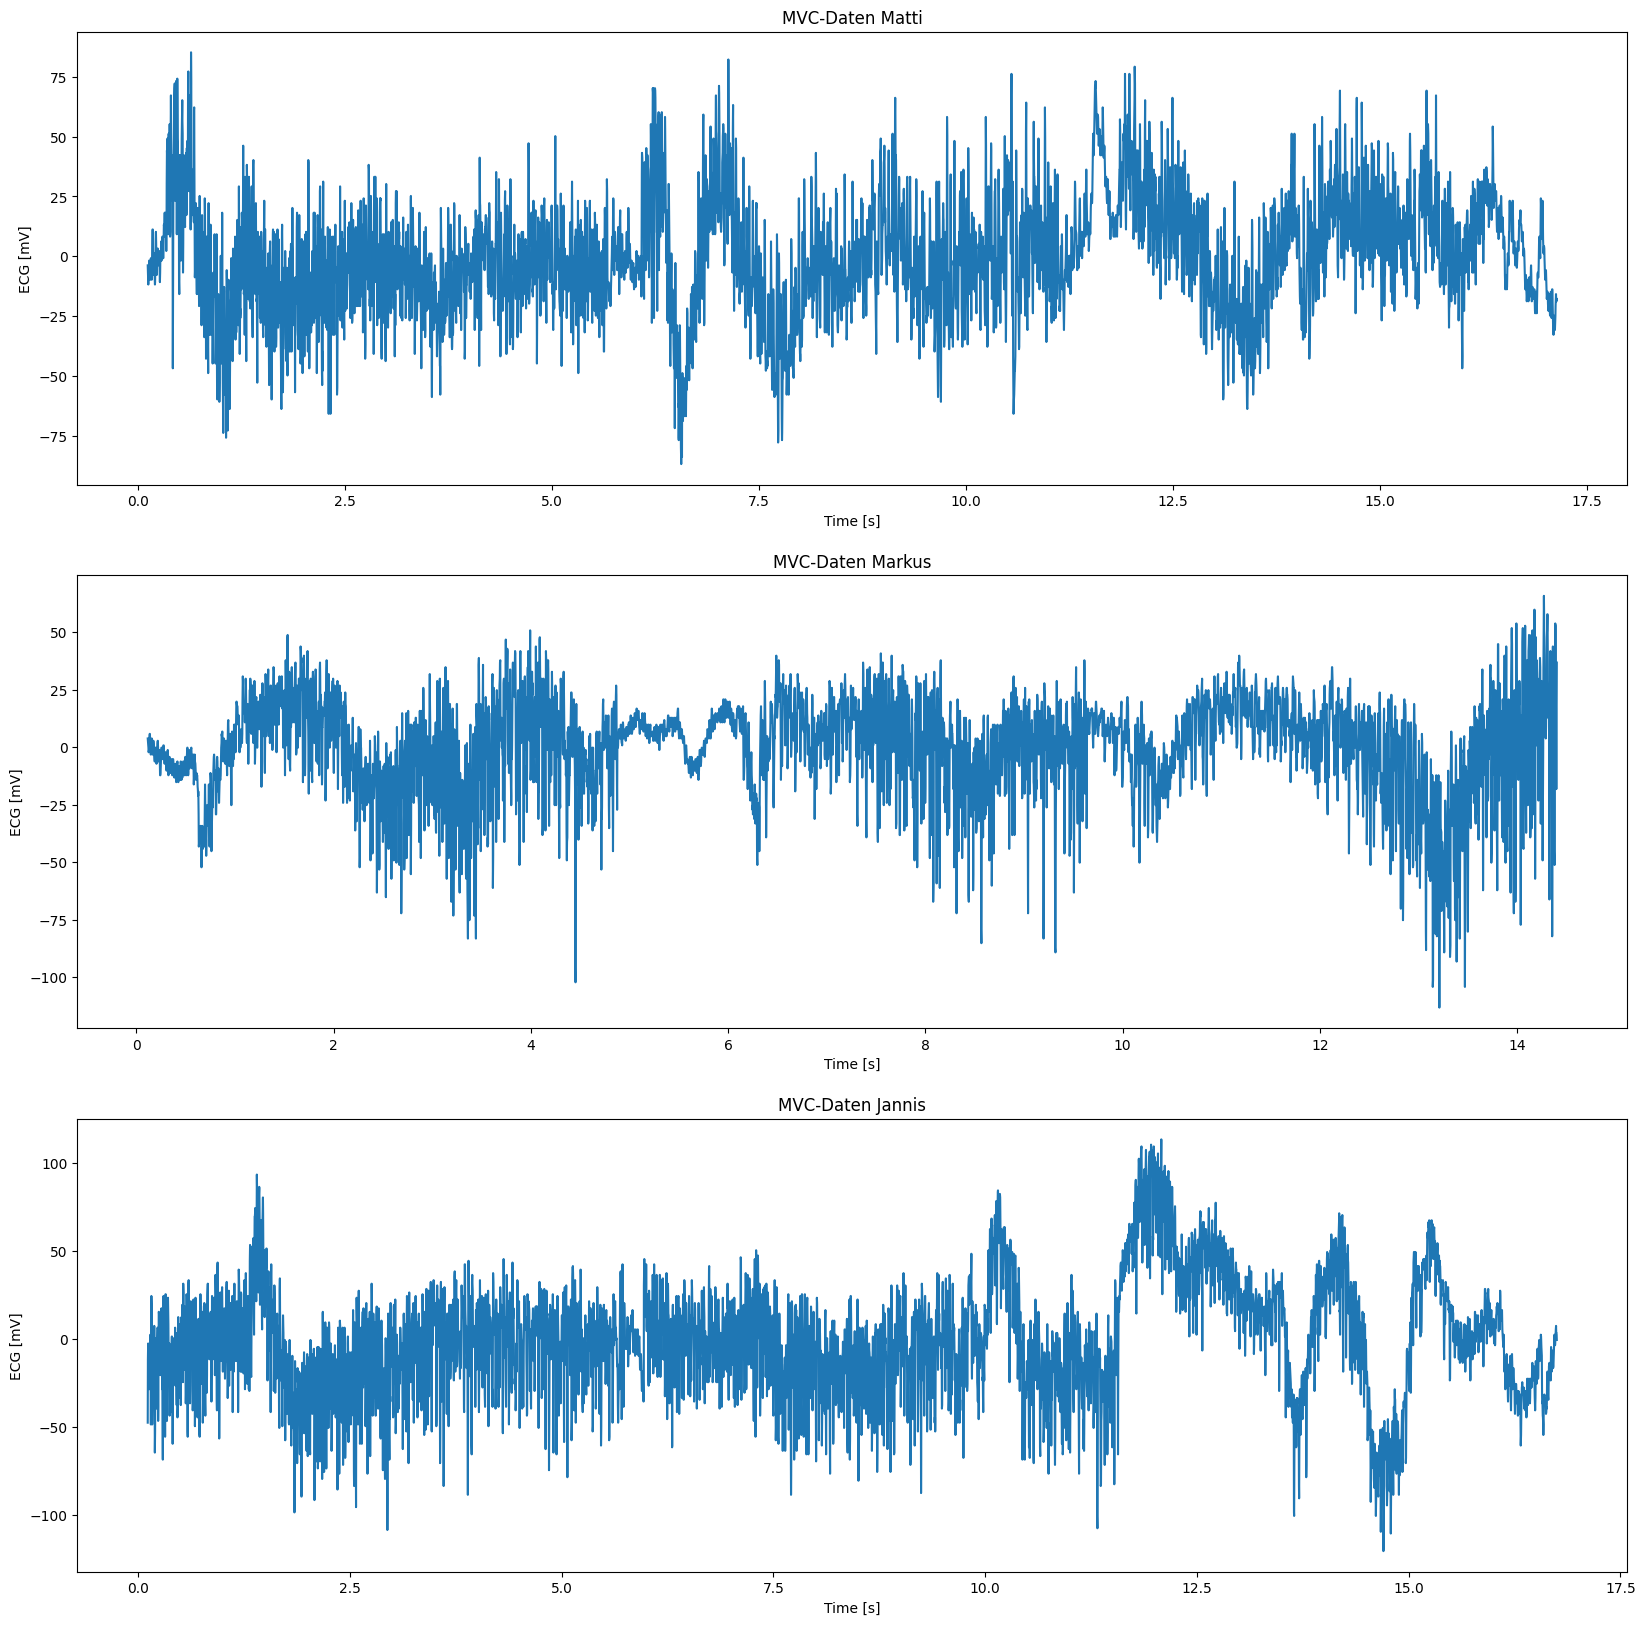

In [4]:
#Plotten der MVC-Daten mit dem Korrigierten Offset
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Plotten MVC-Daten von Matti
ax1.plot(mvc_01_time, mvc_01_emg, label='Matti')
ax1.set_title('MVC-Daten Matti')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Markus
ax2.plot(mvc_02_time, mvc_02_emg, label='Markus')
ax2.set_title('MVC-Daten Markus')
ax2.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Jannis
ax3.plot(mvc_03_time, mvc_03_emg, label='Jannis')
ax3.set_title('MVC-Daten Jannis')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')


## Filtern der Daten

In [5]:
mvc_01_filtered = fm.butter_bandpass_filter(mvc_01_emg, 20, 450, 1000, 5)
mvc_02_filtered = fm.butter_bandpass_filter(mvc_02_emg, 20, 450, 1000, 5)
mvc_03_filtered = fm.butter_bandpass_filter(mvc_03_emg, 20, 450, 1000, 5)
weights_01_filtered = fm.butter_bandpass_filter(weights_01_emg, 20, 450, 1000, 5)
fatigue_01_filtered = fm.butter_bandpass_filter(fatigue_01_emg, 20, 450, 1000, 5)

##### Plot kann man raushauen

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'ECG [mV]')]

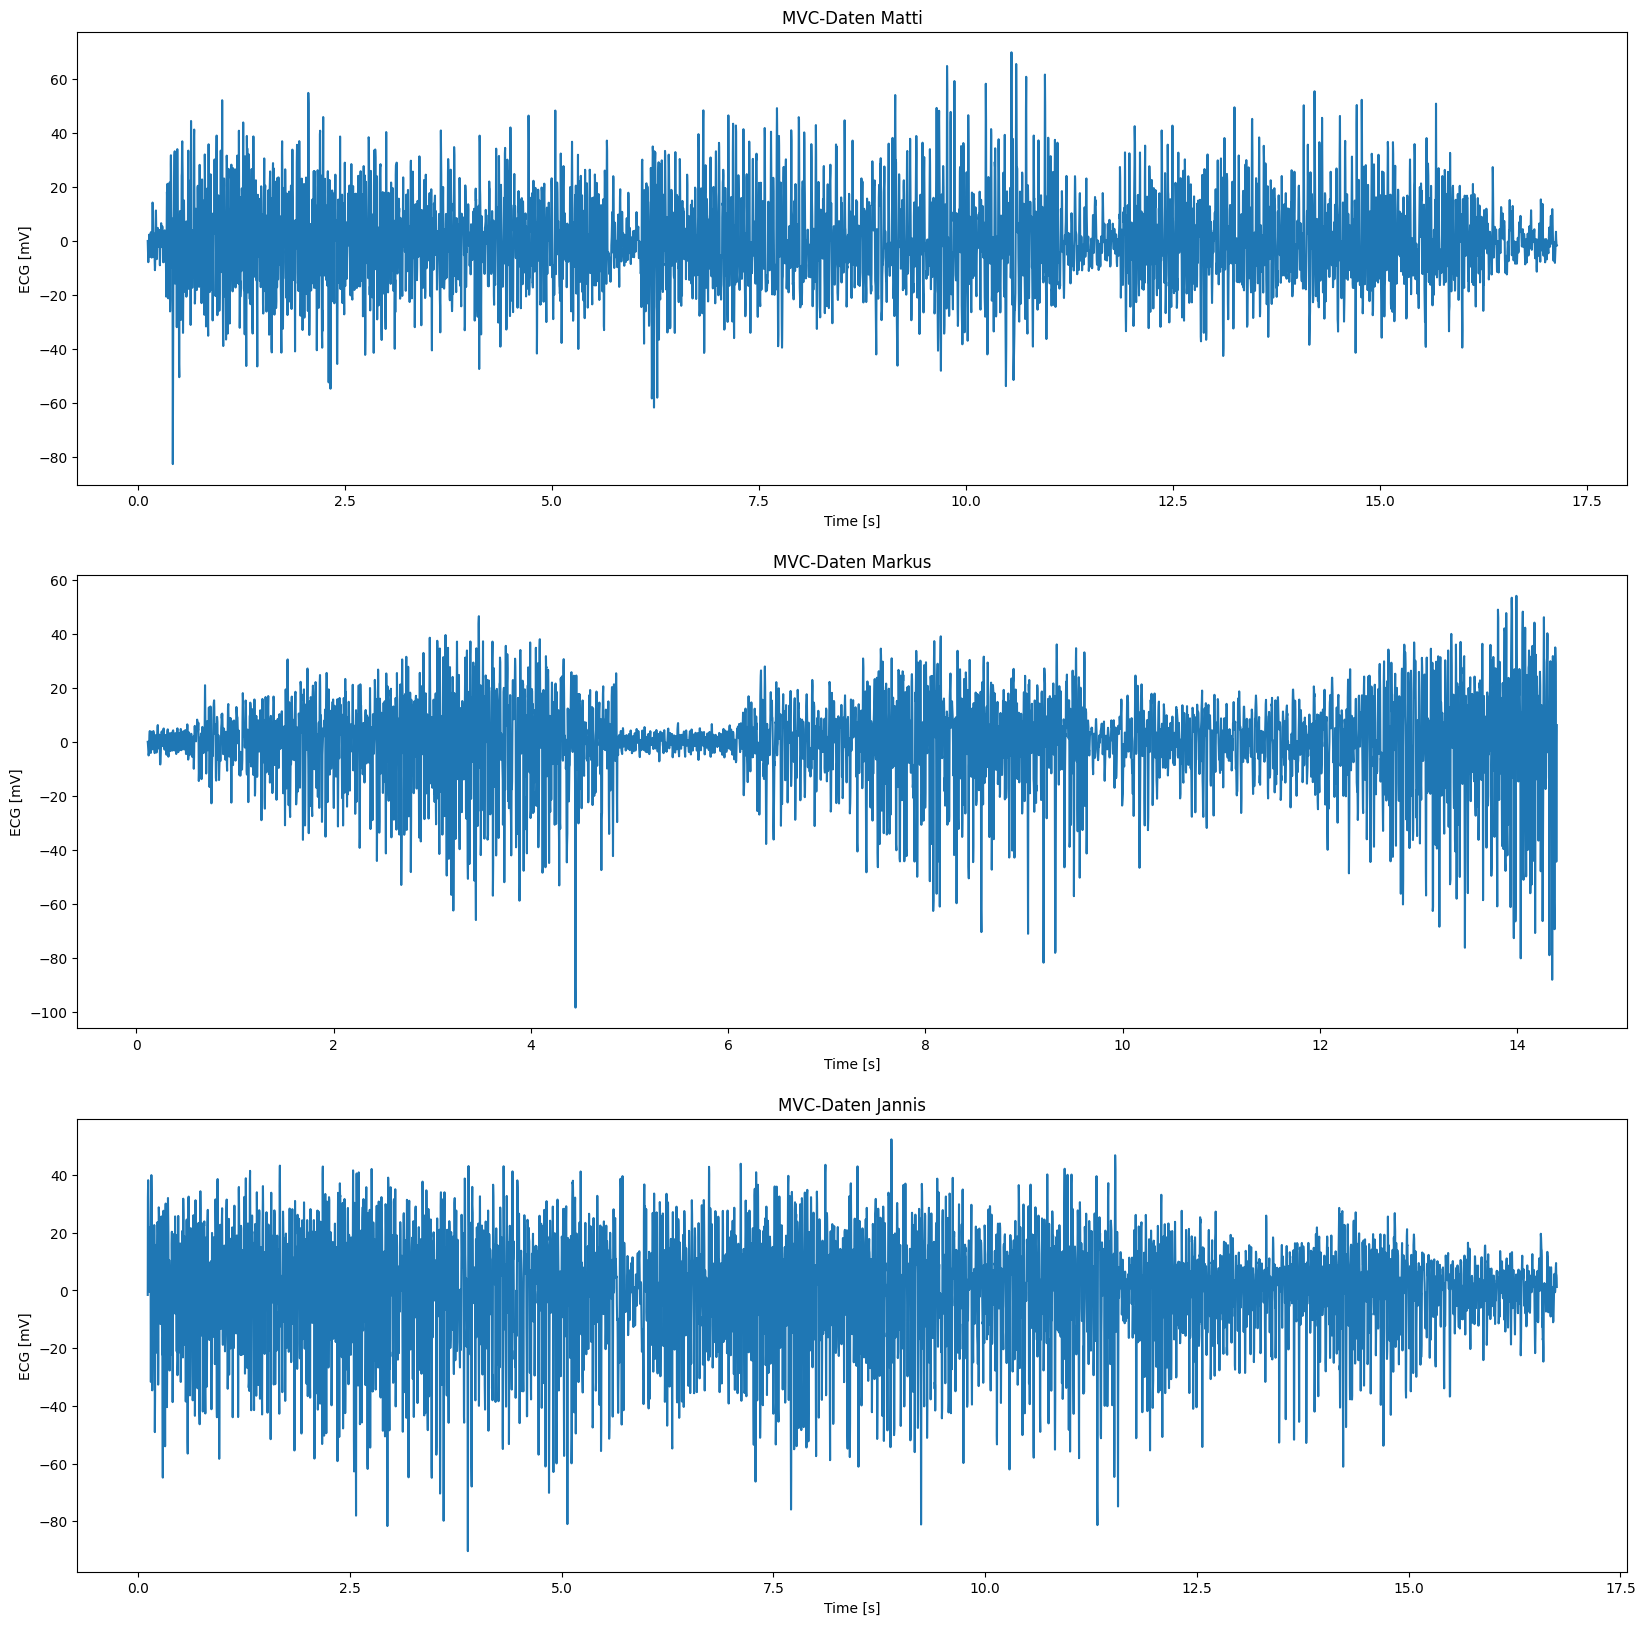

In [6]:
#Plotten der gefilterten MVC-Daten
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Plotten MVC-Daten von Matti
ax1.plot(mvc_01_time, mvc_01_filtered, label='Matti')
ax1.set_title('MVC-Daten Matti')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Markus
ax2.plot(mvc_02_time, mvc_02_filtered, label='Markus')
ax2.set_title('MVC-Daten Markus')
ax2.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Jannis
ax3.plot(mvc_03_time, mvc_03_filtered, label='Jannis')
ax3.set_title('MVC-Daten Jannis')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')


### Gleichrichten der EMG-Daten

In [7]:
mvc_01_rectified = np.abs(mvc_01_filtered)
mvc_02_rectified = np.abs(mvc_02_filtered)
mvc_03_rectified = np.abs(mvc_03_filtered)
weights_01_rectified = np.abs(weights_01_filtered)
fatigue_01_rectified = np.abs(fatigue_01_filtered)


##### Plot kann man raushauen

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'ECG [mV]')]

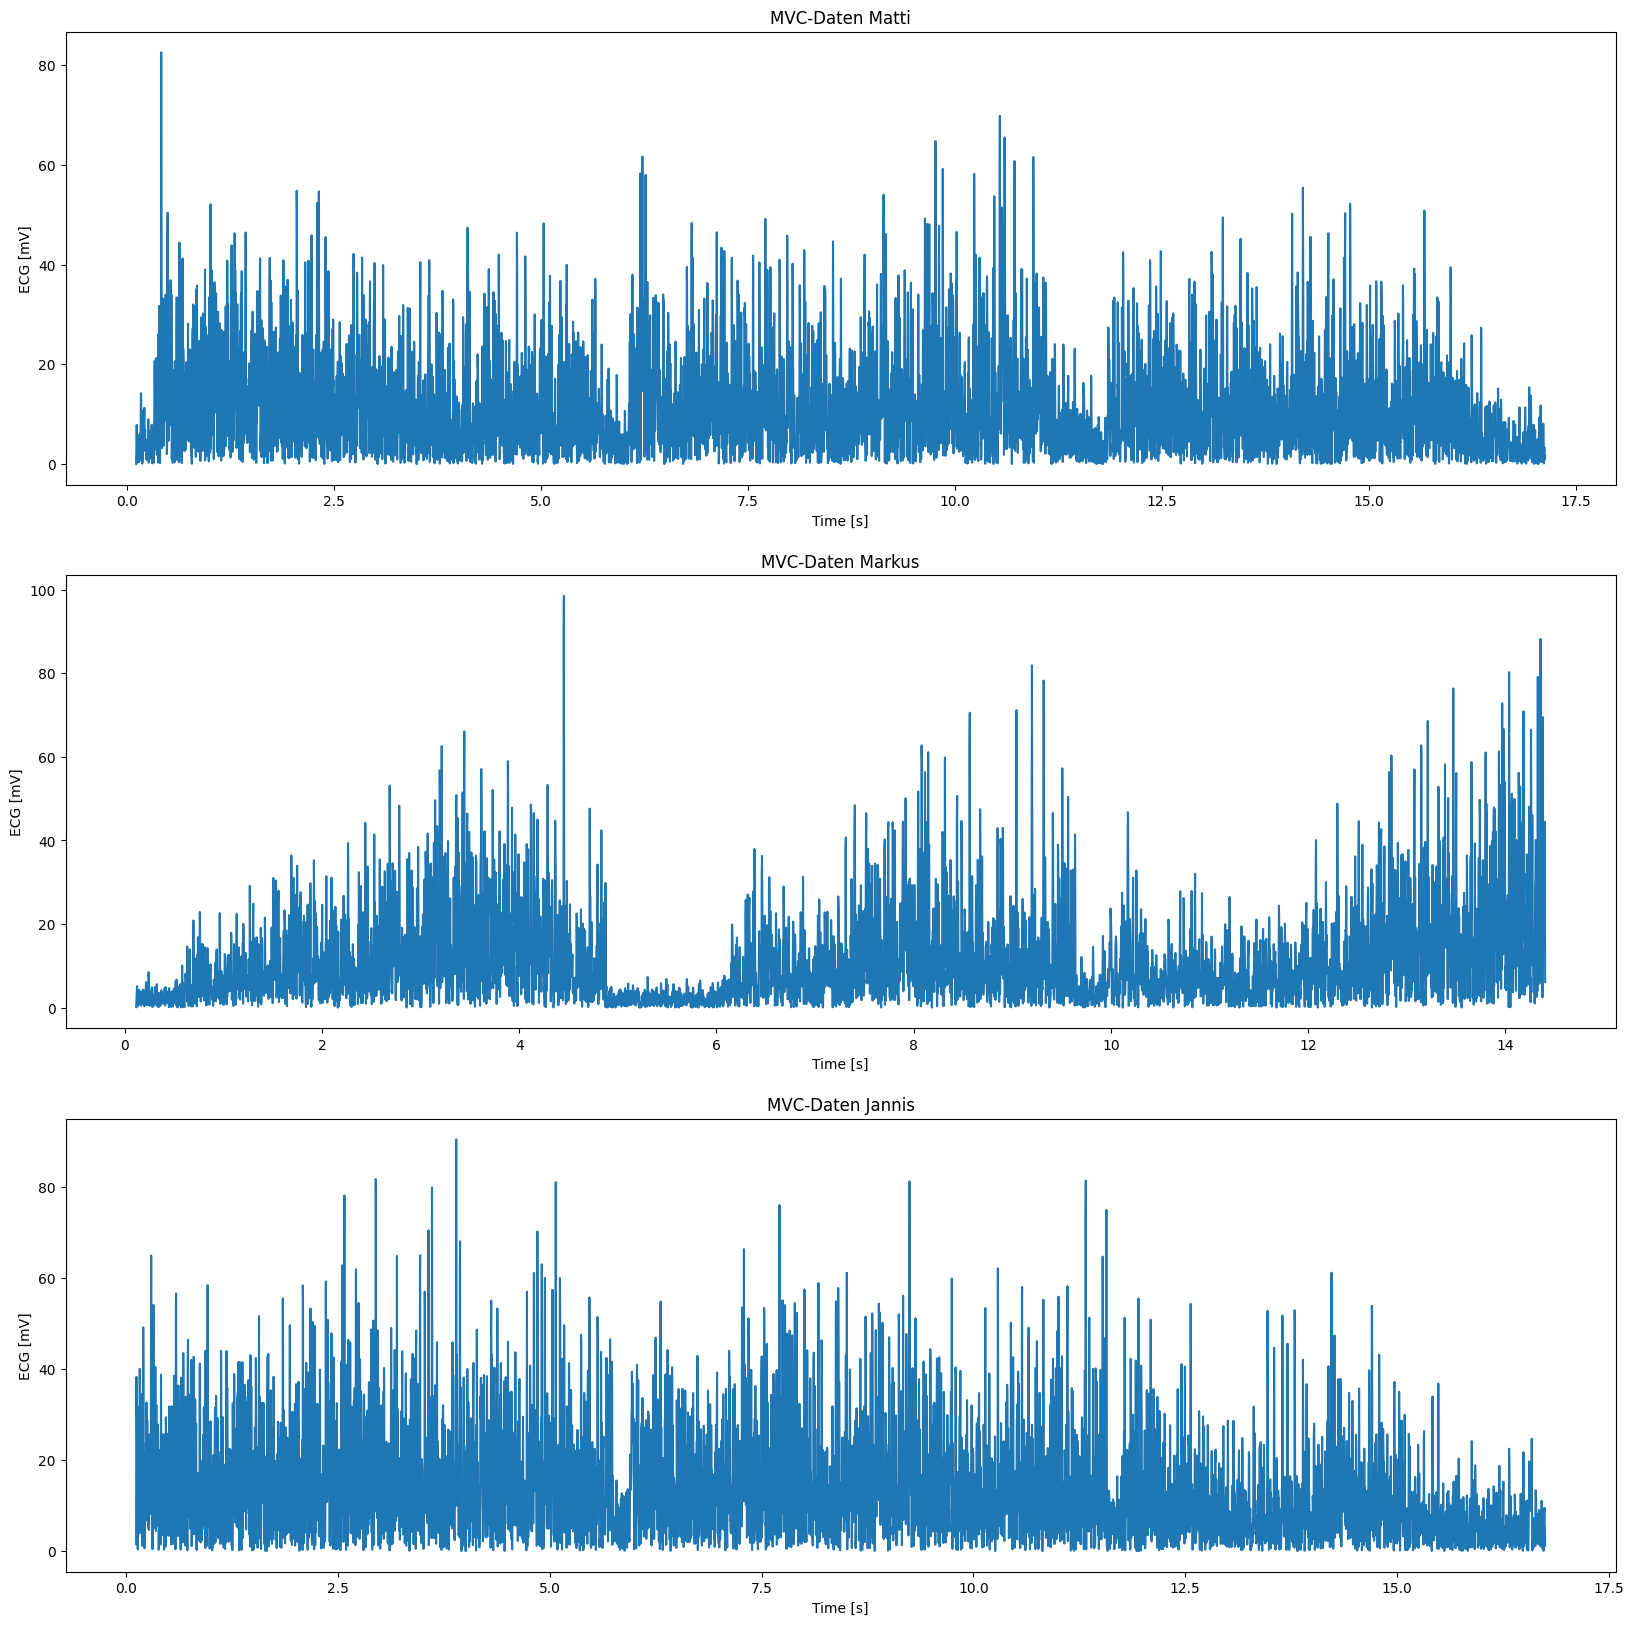

In [8]:
#Plotten der gleichgerichteten MVC-Daten
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Plotten MVC-Daten von Matti
ax1.plot(mvc_01_time, mvc_01_rectified, label='Matti')
ax1.set_title('MVC-Daten Matti')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Markus
ax2.plot(mvc_02_time, mvc_02_rectified, label='Markus')
ax2.set_title('MVC-Daten Markus')
ax2.set(xlabel='Time [s]', ylabel='ECG [mV]')
#Plotten MVC-Daten von Jannis
ax3.plot(mvc_03_time, mvc_03_rectified, label='Jannis')
ax3.set_title('MVC-Daten Jannis')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')

### Bilden der Einhüllenden

In [9]:
mvc_01_envelope = fm.butter_lowpass_filter(mvc_01_rectified, 3, 1000, 5)
mvc_02_envelope = fm.butter_lowpass_filter(mvc_02_rectified, 3, 1000, 5)
mvc_03_envelope = fm.butter_lowpass_filter(mvc_03_rectified, 3, 1000, 5)
weights_01_envelope = fm.butter_lowpass_filter(weights_01_rectified, 3, 1000, 5)
fatigue_01_envelope = fm.butter_lowpass_filter(fatigue_01_rectified, 3, 1000, 5)

##### Plot kann man raushauen

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'EMG [mV]')]

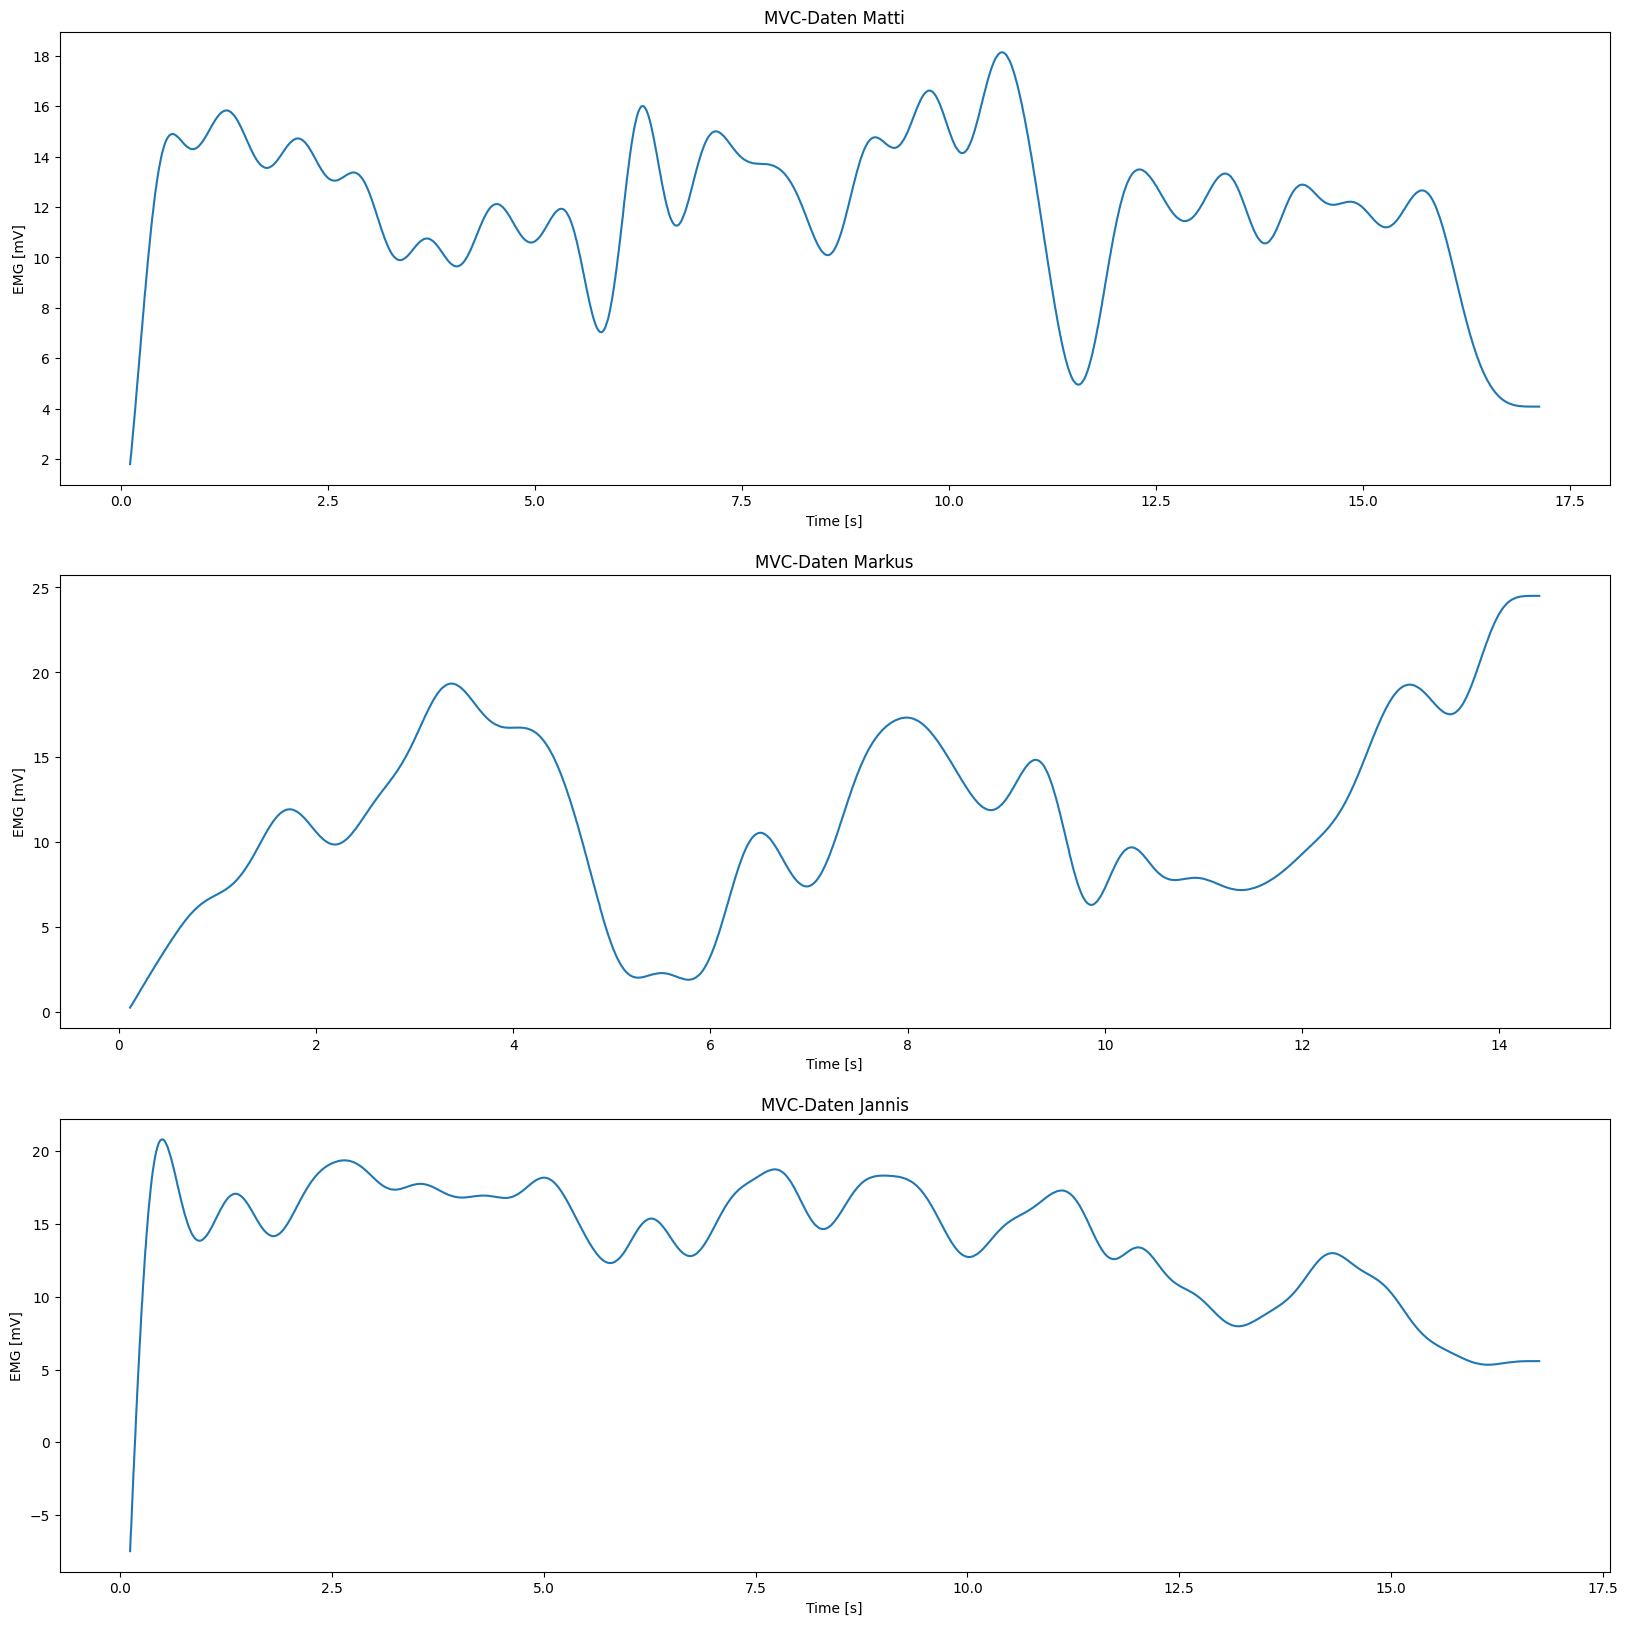

In [10]:
#Plotten der Einhüllenden der MVC-Daten
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Plotten MVC-Daten von Matti
ax1.plot(mvc_01_time, mvc_01_envelope, label='Matti')
ax1.set_title('MVC-Daten Matti')
ax1.set(xlabel='Time [s]', ylabel='EMG [mV]')
#Plotten MVC-Daten von Markus
ax2.plot(mvc_02_time, mvc_02_envelope, label='Markus')
ax2.set_title('MVC-Daten Markus')
ax2.set(xlabel='Time [s]', ylabel='EMG [mV]')
#Plotten MVC-Daten von Jannis
ax3.plot(mvc_03_time, mvc_03_envelope, label='Jannis')
ax3.set_title('MVC-Daten Jannis')
ax3.set(xlabel='Time [s]', ylabel='EMG [mV]')

### Aufgabe 5

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'EMG [mV]')]

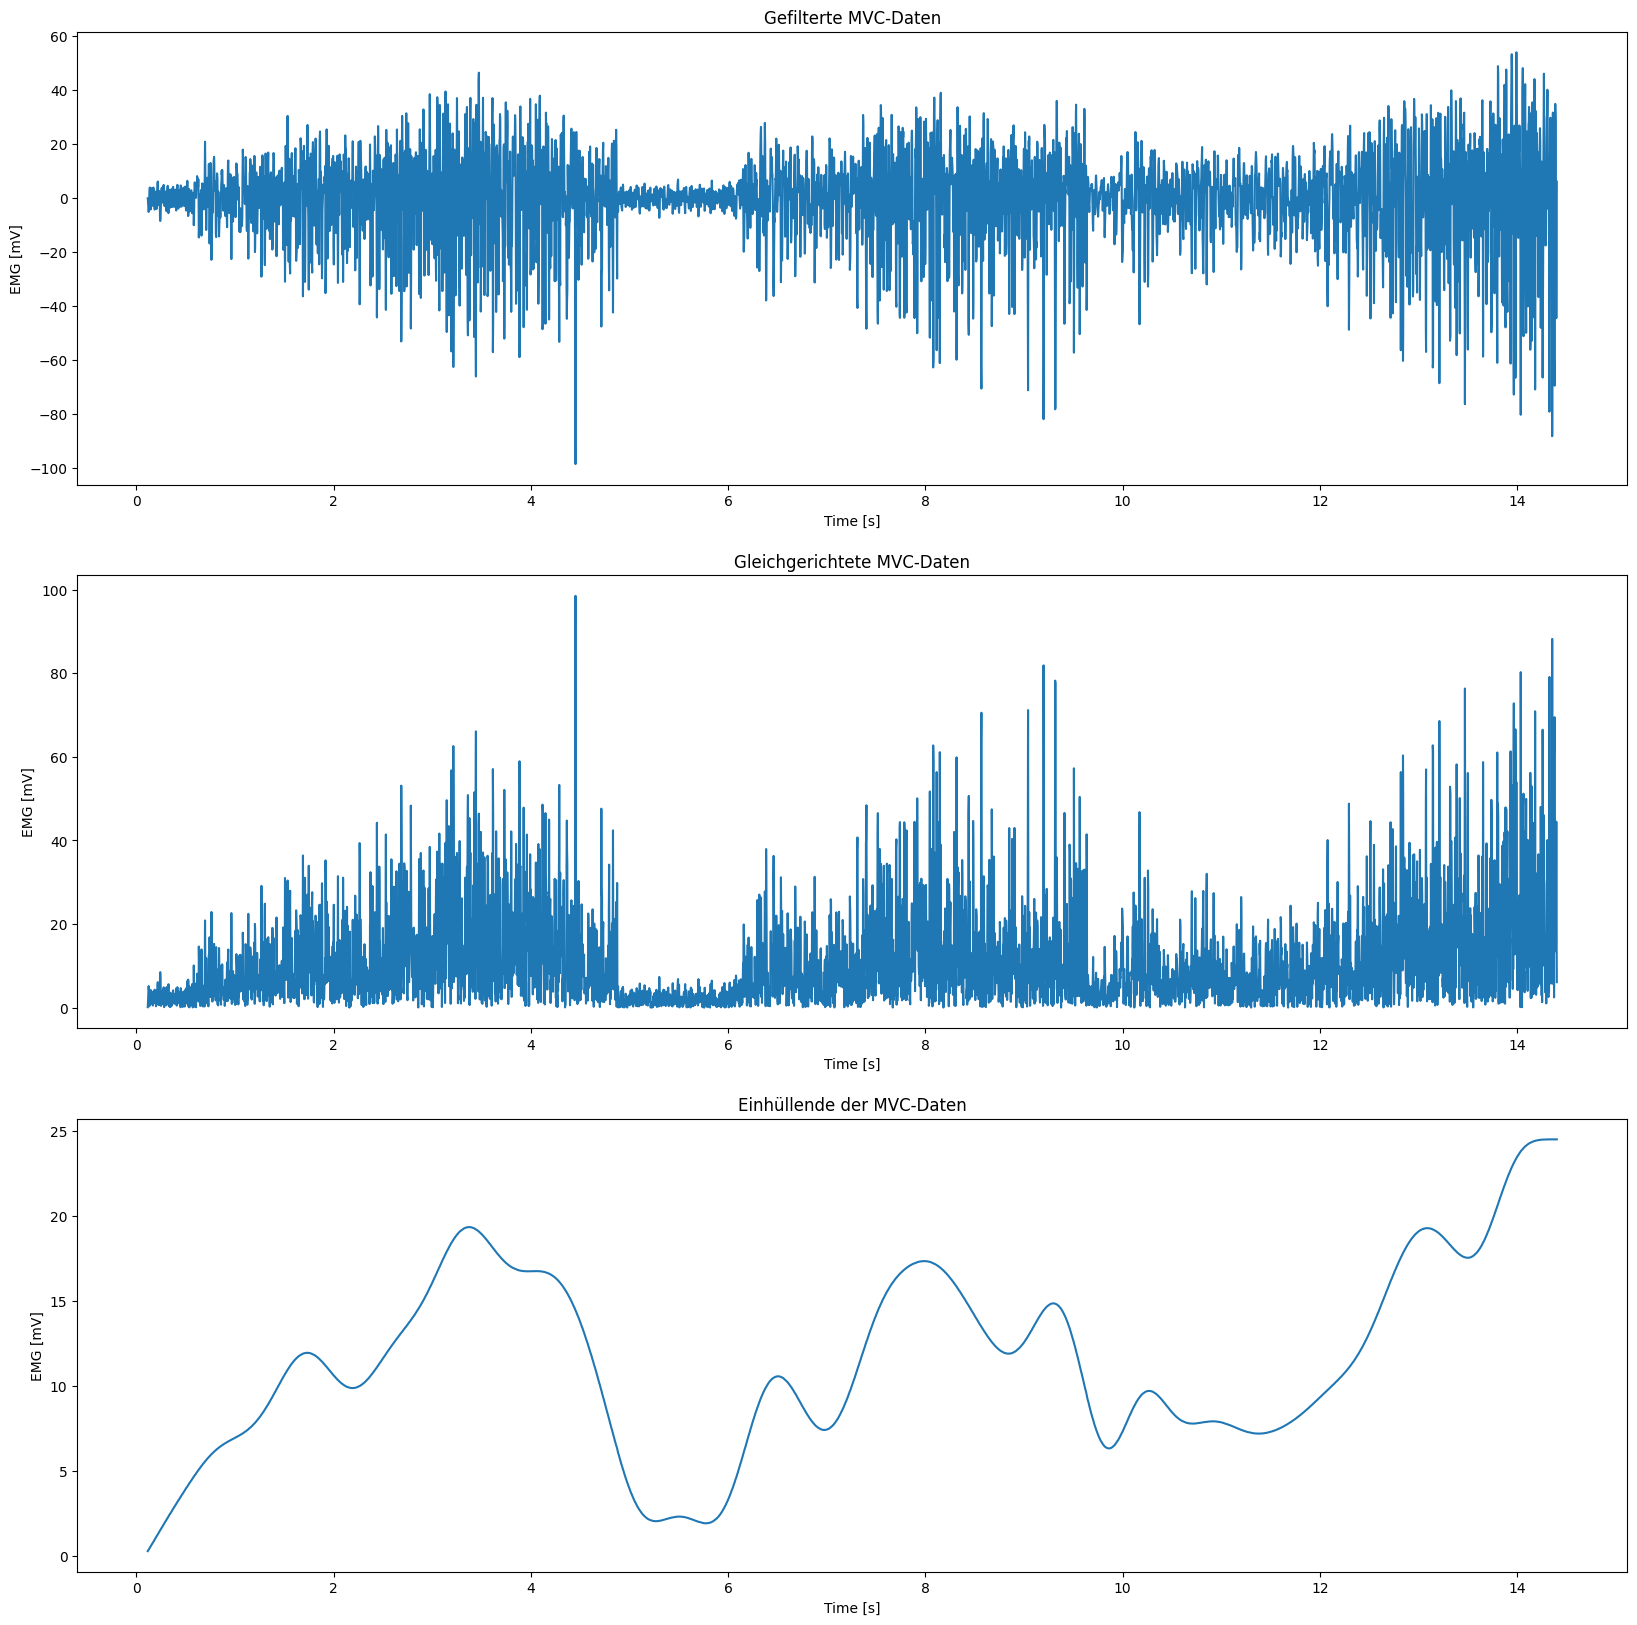

In [11]:
#Plotten der MVC- Daten eines Gruppenmitglieds
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
#Plotten der gefilterten MVC-Daten
ax1.plot(mvc_02_time, mvc_02_filtered)
ax1.set_title('Gefilterte MVC-Daten')
ax1.set(xlabel='Time [s]', ylabel='EMG [mV]')
#Plotten gleichgerichteten MVC-Daten
ax2.plot(mvc_02_time, mvc_02_rectified)
ax2.set_title('Gleichgerichtete MVC-Daten')
ax2.set(xlabel='Time [s]', ylabel='EMG [mV]')
#Plotten der Einhüllenden der MVC-Daten
ax3.plot(mvc_02_time, mvc_02_envelope)
ax3.set_title('Einhüllende der MVC-Daten')
ax3.set(xlabel='Time [s]', ylabel='EMG [mV]')

## Plotten Weights Fatigue

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'EMG [mV]')]

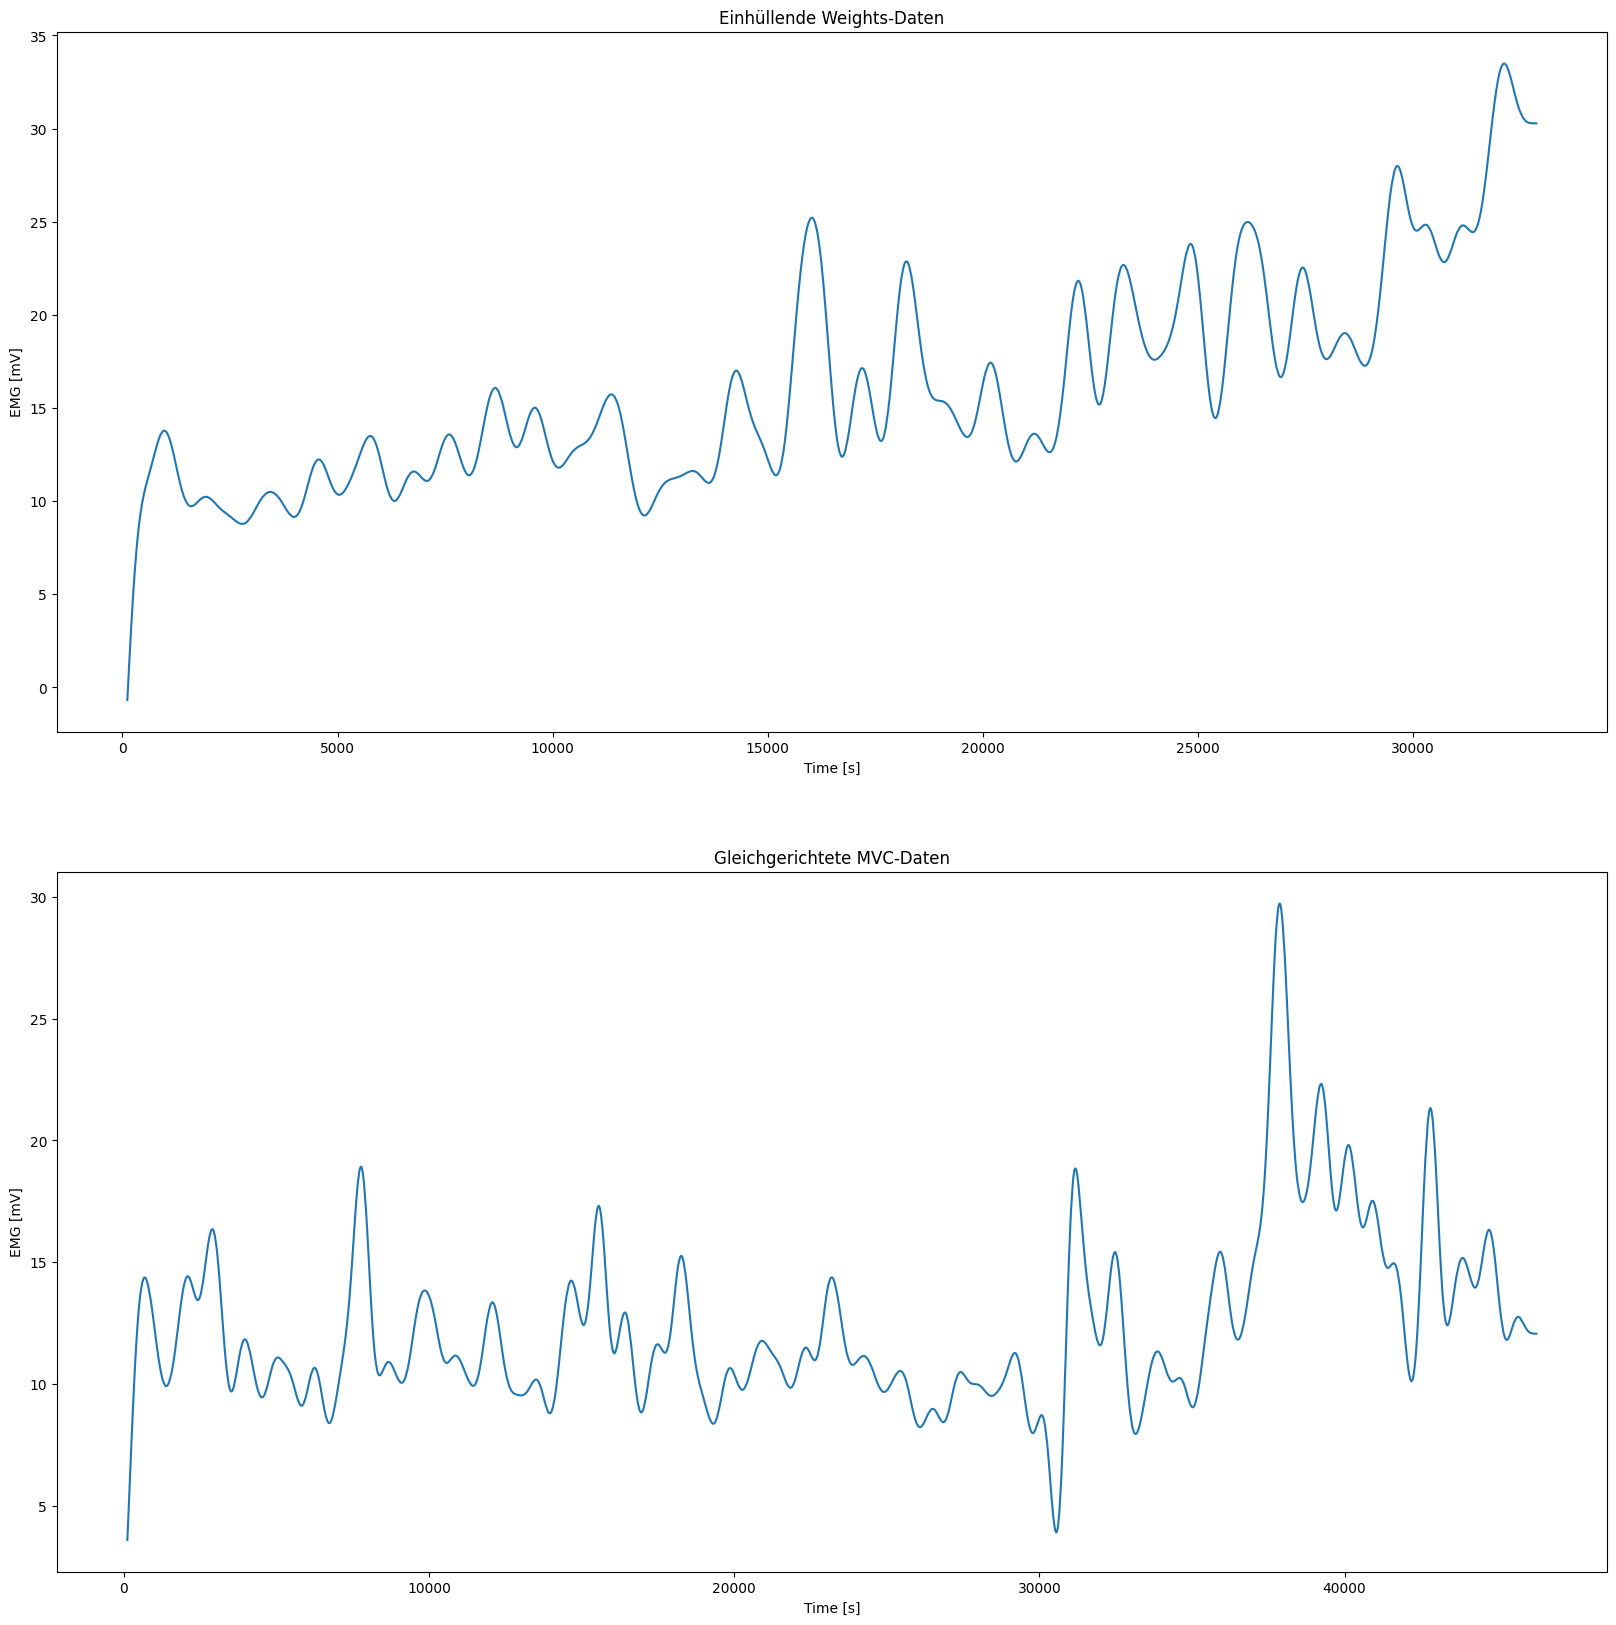

In [ ]:
#Plotten der MVC- Daten eines Gruppenmitglieds
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
#Plotten der gefilterten MVC-Daten
ax1.plot(weights_01_time, weights_01_envelope)
ax1.set_title('Einhüllende Weights-Daten')
ax1.set(xlabel='Time [s]', ylabel='EMG [mV]')
#Plotten gleichgerichteten MVC-Daten
ax2.plot(fatigue_01_time, fatigue_01_envelope)
ax2.set_title('Einhüllende Fatigue-Daten')
ax2.set(xlabel='Time [s]', ylabel='EMG [mV]')
